### Setup and Load Data ###

In [2]:
run ../initialize.ipynb

Lax Version : 1.5.2


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/seaborn-0.8.1-py3.4.egg/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
##Notebook Specific Setup Things
def cut_line(x, m, c):
    return m*x+c

In [4]:
def get_file_list(path, pattern, remove_string='', remove_path=True):
    '''
    Get a list of files matching pattern in path. Optional to remove a part of the path (i.e. the extention)
    Optional to remove the path
    '''
    file_list = glob.glob(path + pattern)
    # Remove path
    for i, f in enumerate(file_list):
        if remove_path:
            f = f.replace(path, '')
        if remove_string != '':
            f = f.replace(remove_string, '')
        file_list[i] = f
    file_list = np.sort(file_list)
    return file_list


### Find premade minitrees ###

In [5]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun1'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']

Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 7229 rows removed (4.56% passed)
Source in place selection: 1185 rows removed (84.35% passed)
Source in place selection: 7119 rows removed (6.01% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [16]:
%%time
print('Radon Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*PI_after_S2.hdf5', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dfs_rn=[]
dfs_kr=[]
dfs_bkg=[]
for dataset in tqdm(datasets[:295]):
    key=dataset[:-17]
    if dataset_names_rn.isin([dataset[:-17]]).any():
        if len(dfs_rn)<10:
            df = hax.minitrees.load(cache_file = simpath+dataset)
            dfs_rn.append(df)
              
    elif dataset_names_kr.isin([dataset[:-17]]).any():
        if len(dfs_kr)<10:
            df = hax.minitrees.load(cache_file = simpath+dataset)
            dfs_kr.append(df)
        
    elif dataset_names_bkg.isin([dataset[:-17]]).any():
        if len(dfs_bkg)<50:
            df = hax.minitrees.load(cache_file = simpath+dataset)
            dfs_bkg.append(df)

    
dfs_rn=pd.concat(dfs_rn)
dfs_kr=pd.concat(dfs_kr)
dfs_bkg=pd.concat(dfs_bkg)

Radon Data
Found 295 datasets

  0%|          | 0/295 [00:00<?, ?it/s]/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/minitrees.py:585: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.cut_history = store.get_storer('data').attrs.cut_history
100%|██████████| 295/295 [02:34<00:00,  1.91it/s]



CPU times: user 1min 52s, sys: 1min 55s, total: 3min 47s
Wall time: 4min 39s


In [21]:
dict_datasets = {'Radon': dfs_rn, 'Krypton': dfs_kr, 'Background': dfs_bkg}

In [17]:
print(len(dfs_kr), len(dfs_bkg), len(dfs_rn))

46417497 50898143 50709155


In [ ]:

#Note arctan 2 is defined as -pi to pi.
df_PI['dist_to_s2_nn'] = np.sqrt((df_PI['x_s2_nn'].values-df_PI['x_p_nn'].values)**2 + 
                                       (df_PI['y_s2_nn'].values-df_PI['y_p_nn'].values**2))
df_PI['r_peak_nn'] = np.sqrt(df_PI['x_p_nn']**2+df_PI['y_p_nn']**2)
df_PI['theta_s2_nn'] = np.arctan2(df_PI['y_s2_nn'],df_PI['x_s2_nn'])
df_PI['theta_p_nn'] = np.arctan2(df_PI['y_p_nn'],df_PI['x_p_nn'])
df_PI['delta_theta_nn'] = np.arctan2((df_PI['y_p_nn']-df_PI['y_s2_nn']),
                                              (df_PI['x_p_nn']-df_PI['x_s2_nn']))

df_PI['dist_to_s2_tpf'] = np.sqrt((df_PI['x_s2_tpf']-df_PI['x_p_tpf'])**2 + 
                                       (df_PI['y_s2_tpf']-df_PI['y_p_tpf']**2))
df_PI['r_peak_tpf'] = np.sqrt(df_PI['x_p_tpf']**2+df_PI['y_p_tpf']**2)
df_PI['theta_s2_tpf'] = np.arctan2(df_PI['y_s2_tpf'],df_PI['x_s2_tpf'])
df_PI['theta_p_tpf'] = np.arctan2(df_PI['y_p_tpf'],df_PI['x_p_tpf'])
df_PI['delta_theta_tpf'] = np.arctan2((df_PI['y_p_tpf']-df_PI['y_s2_tpf']),
                                              (df_PI['x_p_tpf']-df_PI['x_s2_tpf']))

### Create Dicts for DFs ###

Radon 50709155


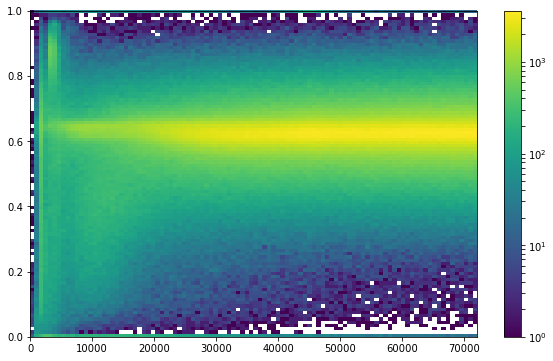

Background 50898143


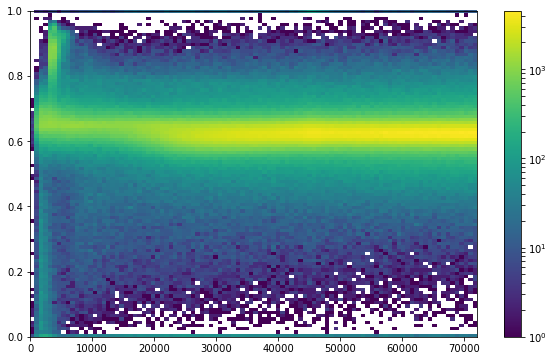

Krypton 46417497


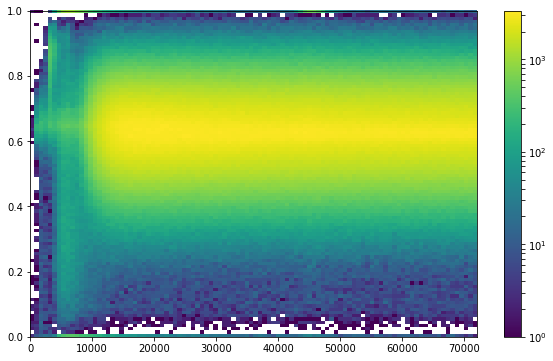

In [22]:
_xbins=100
_ybins=100
_x_lower=0
_x_upper=72000
_y_lower=0
_y_upper=1

_x_range=[_x_lower, _x_upper]
_y_range=[_y_lower, _y_upper]
for key, data in dict_datasets.items():
    print(key, len(data))
    fig=plt.figure(figsize=(10, 6))
    plt.hist2d(data.time_since_s2, data.area_fraction_top, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    #plt.xlabel('Electrons') 
    #plt.ylabel('Photons')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()

## Comments on parameter checking: 
  * 0.03% of peaks have an AFT value 0-Inconsequential
  * 22.74% have AFT<0.55
      * Possible second scatter distribution at 5-20 us, indicated by larger peak sizes?.....Check krypton/background data. Might be misidentified S1s? Time scale too long for  true double scatter though...
      * Backed up by S2 width distribution, which has widening distribution in same time scale, with longer time since s2 implying greaer width. Actually no, this is probably S2 from BiPo decays which are known and expected, as seems to start arriving immediatel after primary S2.
      * Distribution not seen in Krypton, which is dominated by Kr events. Could be consistent? Normalize rates
  * 16.84% have AFT>0.65
      * Probably includes Gate PI as very large peak at 3 us, whcih corresponds to expected value. Again, check with kr/bkg data, and SR0 to test hypothesis
  * Could be that small peaks have much wider AFT distribution? 64.16% of peaks have n_hits<50
      * This indeed appears to be the case. Probably requires relaxing AFT cut in this regime. Cross check with PatternLikelihood probably required after loosening cut
      * Krypton has much wider peak dsitribution in AFT than Rn/Bkg. Could be due o more low enegry peaks?
      * This holds, up. n_hits<50 has very wide band. n_hits>50 very confined. Though has large number of peaks at very small AFT values. Probably from injection, not actual S2 events. Can use to se cut, want to exclude these points
  * Doesn't seem to be anything of note in n_contributing_channels
  * GOF between TPF and NN seems to be constant throughout drift time, and more or less equivalent.

Radon 50709155


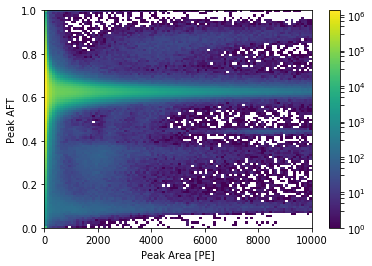

Background 50898143


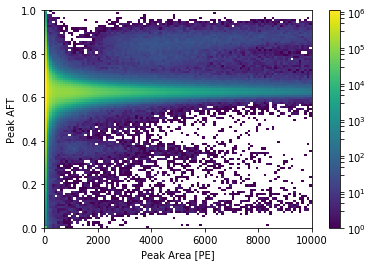

Krypton 46417497


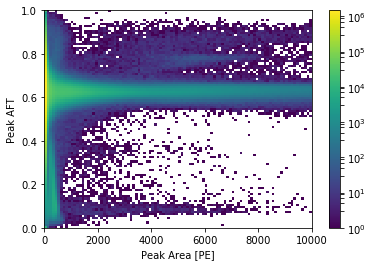

In [114]:
_xbins=100
_ybins=100
_x_lower=0
_x_upper=10000
_y_lower=0
_y_upper=1

_x_range=[_x_lower, _x_upper]
_y_range=[_y_lower, _y_upper]

for key, data in dict_datasets.items():
    print(key, len(data))
    plt.hist2d(data.area, data.area_fraction_top, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    plt.xlabel('Peak Area [PE]') 
    plt.ylabel('Peak AFT')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()

Radon 50709155


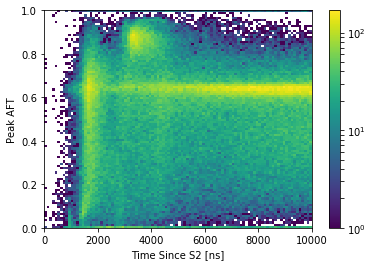

Background 50898143


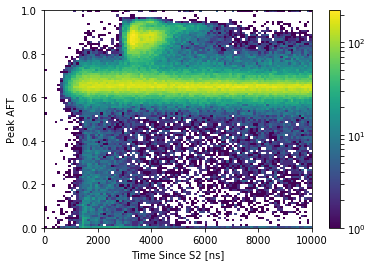

Krypton 46417497


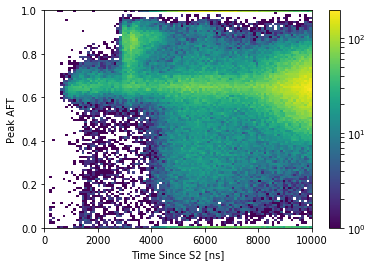

In [116]:
for key, data in dict_datasets.items():
    print(key, len(data))
    _xbins=100
    _ybins=100
    _x_lower=0
    _x_upper=10000
    _y_lower=0
    _y_upper=1

    _x_range=[_x_lower, _x_upper]
    _y_range=[_y_lower, _y_upper]

    plt.hist2d(data.time_since_s2, data.area_fraction_top, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    plt.xlabel('Time Since S2 [ns]') 
    plt.ylabel('Peak AFT')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()



### Events Occurring within 5ms of primary S2

Shows clear gate events, with high AFT value

In [51]:
dict_datasets_test={}
for key, data in dict_datasets.items():
    data_test=hax.cuts.selection(data, data['time_since_s2']<5000, "Hits Cut")
    dict_datasets_test[key]=data_test

Hits Cut selection: 50606976 rows removed (0.20% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Hits Cut selection: 50811058 rows removed (0.17% passed)
Hits Cut selection: 46386110 rows removed (0.07% passed)


Radon 102179


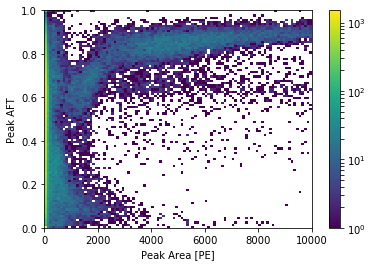

Background 87085


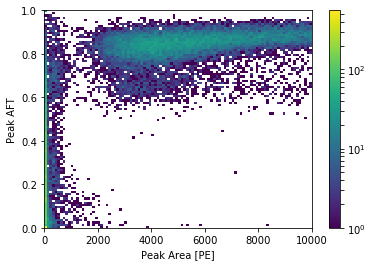

Krypton 31387


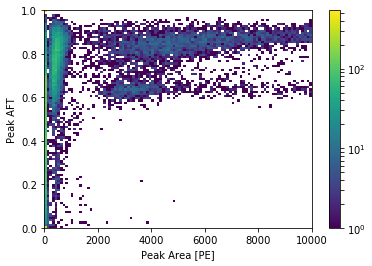

In [112]:
_xbins=100
_ybins=100
_x_lower=0
_x_upper=10000
_y_lower=0
_y_upper=1

_x_range=[_x_lower, _x_upper]
_y_range=[_y_lower, _y_upper]

for key, data in dict_datasets_test.items():
    print(key, len(data))
    plt.hist2d(data.area, data.area_fraction_top, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    plt.xlabel('Peak Area [PE]') 
    plt.ylabel('Peak AFT')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()

Radon 102179


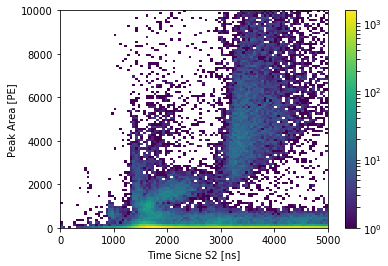

Background 87085


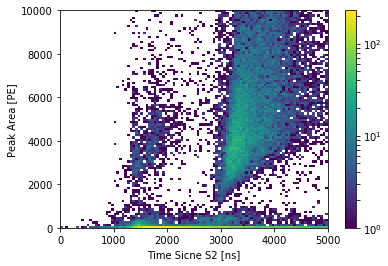

Krypton 31387


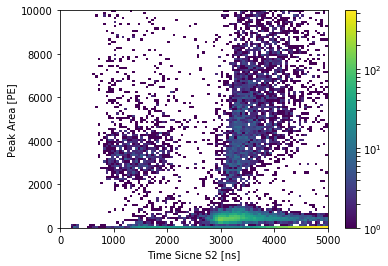

In [121]:
_xbins=100
_ybins=100
_x_lower=0
_x_upper=5000
_y_lower=0
_y_upper=10000

_x_range=[_x_lower, _x_upper]
_y_range=[_y_lower, _y_upper]
for key, data in dict_datasets_test.items():
    print(key, len(data))
    plt.hist2d(data.time_since_s2, data.area, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    plt.xlabel('Time Since S2 [ns]') 
    plt.ylabel('Peak Area [PE]')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()

### Define wider S2 AFT cut

Radon 50709155
1.0 1.4
LowerBound selection: 126743 rows removed (99.75% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


UpperBound selection: 43145547 rows removed (14.70% passed)
Amplitude a: 208650.4403+/-91389.2454
Mean a: 0.6096+/-0.000000
Sigma a: 0.1409+/-0.000000


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


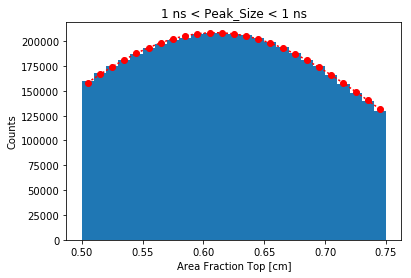

1.4 1.8
LowerBound selection: 7563608 rows removed (85.08% passed)
UpperBound selection: 18793268 rows removed (56.44% passed)
Amplitude a: 873789.9369+/-1835061.4361
Mean a: 0.6220+/-0.000000
Sigma a: 0.1091+/-0.000000


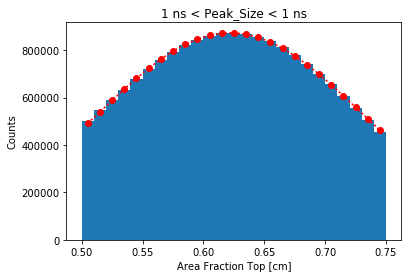

1.8 2.2
LowerBound selection: 31915887 rows removed (37.06% passed)
UpperBound selection: 9463932 rows removed (49.64% passed)
Amplitude a: 534309.3837+/-4236649.8933
Mean a: 0.6221+/-0.000000
Sigma a: 0.0678+/-0.000000


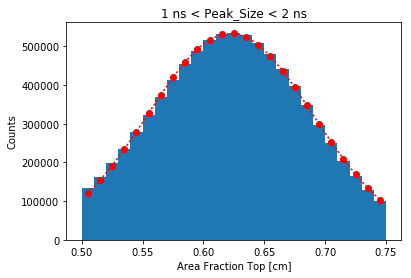

2.2 2.6
LowerBound selection: 41245223 rows removed (18.66% passed)
UpperBound selection: 5466004 rows removed (42.24% passed)
Amplitude a: 352673.9574+/-3459183.2650
Mean a: 0.6232+/-0.000000
Sigma a: 0.0442+/-0.000000


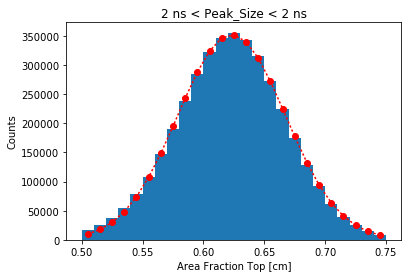

2.6 3.0
LowerBound selection: 45243151 rows removed (10.78% passed)
UpperBound selection: 3028657 rows removed (44.59% passed)
Amplitude a: 342207.4367+/-2784398.7447
Mean a: 0.6240+/-0.000000
Sigma a: 0.0279+/-0.000000


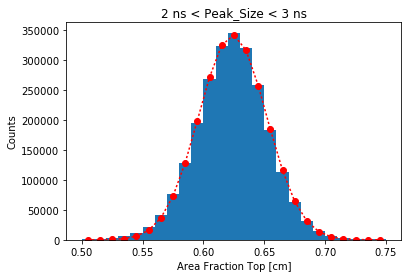

3.0 3.4000000000000004
LowerBound selection: 47680498 rows removed (5.97% passed)
UpperBound selection: 971120 rows removed (67.94% passed)
Amplitude a: 413492.1469+/-3888455.6226
Mean a: 0.6247+/-0.000000
Sigma a: 0.0193+/-0.000000


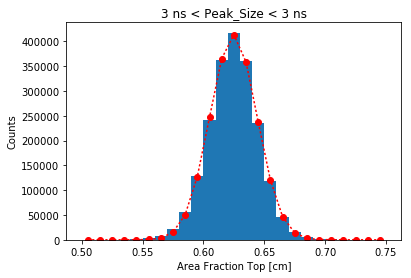

3.4000000000000004 3.8000000000000003
LowerBound selection: 49738035 rows removed (1.92% passed)
UpperBound selection: 297698 rows removed (69.34% passed)
Amplitude a: 180599.8450+/-1357727.3482
Mean a: 0.6252+/-0.000000
Sigma a: 0.0139+/-0.000000


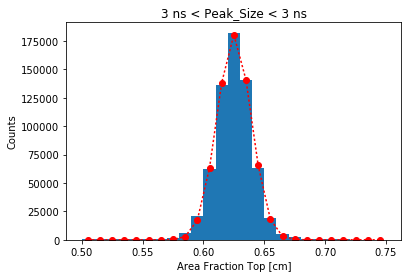

3.8000000000000003 4.2
LowerBound selection: 50411457 rows removed (0.59% passed)
UpperBound selection: 197155 rows removed (33.77% passed)
Amplitude a: 22571.7342+/-405215.1531
Mean a: 0.6271+/-0.000000
Sigma a: 0.0134+/-0.000000


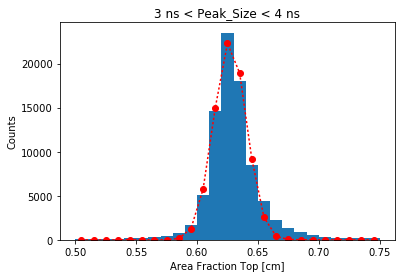

4.2 4.6
LowerBound selection: 50512000 rows removed (0.39% passed)
UpperBound selection: 149250 rows removed (24.30% passed)
Amplitude a: 7474.6092+/-54730.1268
Mean a: 0.6331+/-0.000001
Sigma a: 0.0200+/-0.000001


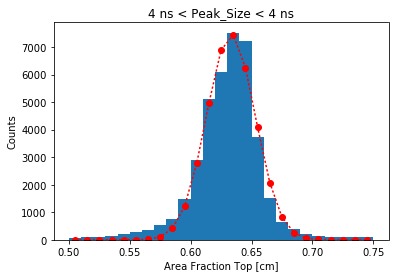

4.6 5.0
LowerBound selection: 50559905 rows removed (0.29% passed)
UpperBound selection: 71745 rows removed (51.93% passed)
Amplitude a: 12519.7934+/-282915.1187
Mean a: 0.6333+/-0.000001
Sigma a: 0.0199+/-0.000001


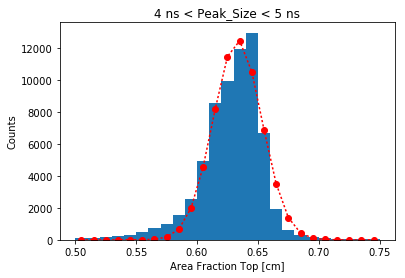

Background 50898143
1.0 1.4
LowerBound selection: 132856 rows removed (99.74% passed)
UpperBound selection: 45220151 rows removed (10.92% passed)
Amplitude a: 155261.1681+/-57183.0444
Mean a: 0.6022+/-0.000000
Sigma a: 0.1404+/-0.000001


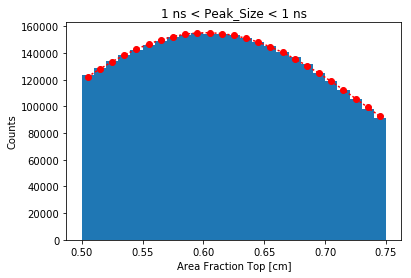

1.4 1.8
LowerBound selection: 5677992 rows removed (88.84% passed)
UpperBound selection: 25704598 rows removed (43.16% passed)
Amplitude a: 708990.0862+/-1222312.6976
Mean a: 0.6220+/-0.000000
Sigma a: 0.1082+/-0.000000


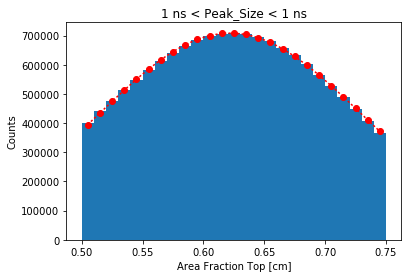

1.8 2.2
LowerBound selection: 25193545 rows removed (50.50% passed)
UpperBound selection: 16945824 rows removed (34.07% passed)
Amplitude a: 522140.6040+/-2413922.7103
Mean a: 0.6242+/-0.000000
Sigma a: 0.0660+/-0.000000


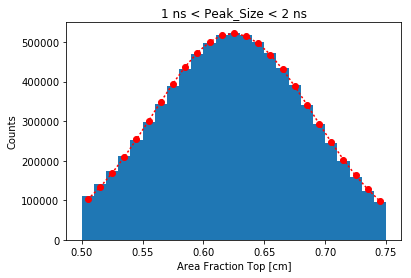

2.2 2.6
LowerBound selection: 33952319 rows removed (33.29% passed)
UpperBound selection: 11496713 rows removed (32.16% passed)
Amplitude a: 502869.6053+/-4203559.5202
Mean a: 0.6239+/-0.000000
Sigma a: 0.0428+/-0.000000


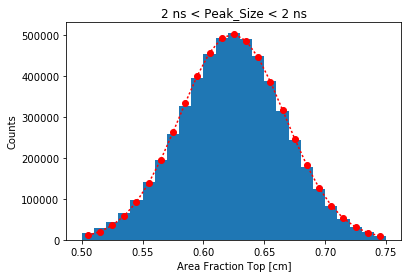

2.6 3.0
LowerBound selection: 39401430 rows removed (22.59% passed)
UpperBound selection: 6504344 rows removed (43.42% passed)
Amplitude a: 724673.8888+/-8844851.1668
Mean a: 0.6236+/-0.000000
Sigma a: 0.0272+/-0.000000


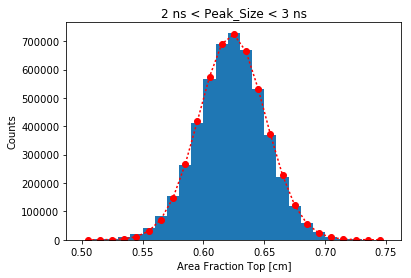

3.0 3.4000000000000004
LowerBound selection: 44393799 rows removed (12.78% passed)
UpperBound selection: 1923858 rows removed (70.42% passed)
Amplitude a: 956754.3647+/-17872542.3090
Mean a: 0.6237+/-0.000000
Sigma a: 0.0189+/-0.000000


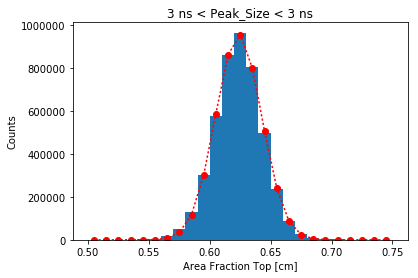

3.4000000000000004 3.8000000000000003
LowerBound selection: 48974285 rows removed (3.78% passed)
UpperBound selection: 447712 rows removed (76.73% passed)
Amplitude a: 426959.4138+/-6601901.5368
Mean a: 0.6240+/-0.000000
Sigma a: 0.0134+/-0.000000


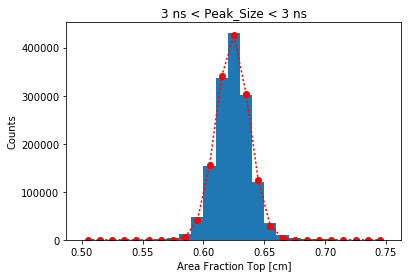

3.8000000000000003 4.2
LowerBound selection: 50450431 rows removed (0.88% passed)
UpperBound selection: 284681 rows removed (36.41% passed)
Amplitude a: 48051.6249+/-1494110.8508
Mean a: 0.6253+/-0.000000
Sigma a: 0.0112+/-0.000000


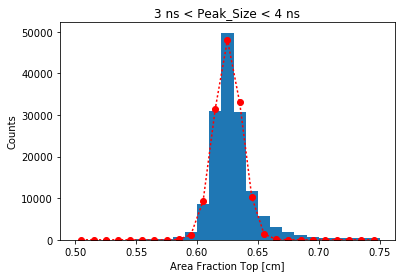

4.2 4.6
LowerBound selection: 50613462 rows removed (0.56% passed)
UpperBound selection: 241436 rows removed (15.19% passed)
Amplitude a: 6019.0080+/-66097.3054
Mean a: 0.6394+/-0.000001
Sigma a: 0.0208+/-0.000001


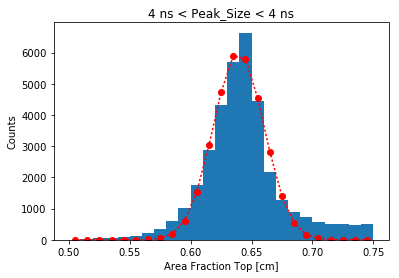

4.6 5.0
LowerBound selection: 50656707 rows removed (0.47% passed)
UpperBound selection: 174393 rows removed (27.77% passed)
Amplitude a: 10683.4779+/-343397.0059
Mean a: 0.6416+/-0.000002
Sigma a: 0.0214+/-0.000002


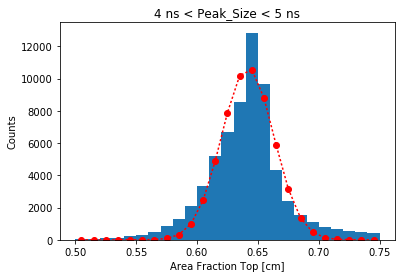

Krypton 46417497
1.0 1.4
LowerBound selection: 119977 rows removed (99.74% passed)
UpperBound selection: 36996661 rows removed (20.09% passed)
Amplitude a: 277798.7008+/-126227.0696
Mean a: 0.6238+/-0.000000
Sigma a: 0.1349+/-0.000000


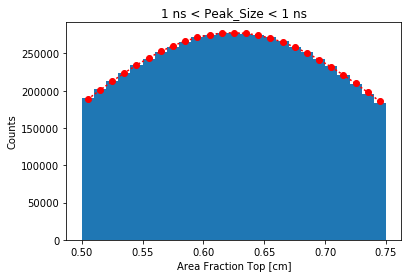

1.4 1.8
LowerBound selection: 9420836 rows removed (79.70% passed)
UpperBound selection: 7423737 rows removed (79.93% passed)
Amplitude a: 1061245.7521+/-1956064.5861
Mean a: 0.6303+/-0.000000
Sigma a: 0.1110+/-0.000000


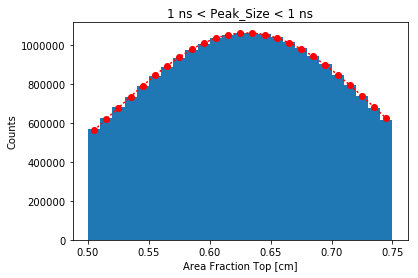

1.8 2.2
LowerBound selection: 38993760 rows removed (15.99% passed)
UpperBound selection: 3831997 rows removed (48.38% passed)
Amplitude a: 198657.6720+/-290022.0222
Mean a: 0.6269+/-0.000000
Sigma a: 0.0699+/-0.000000


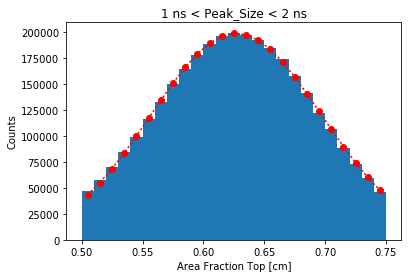

2.2 2.6
LowerBound selection: 42585500 rows removed (8.26% passed)
UpperBound selection: 2560775 rows removed (33.17% passed)
Amplitude a: 100116.1668+/-183802.1618
Mean a: 0.6244+/-0.000000
Sigma a: 0.0429+/-0.000000


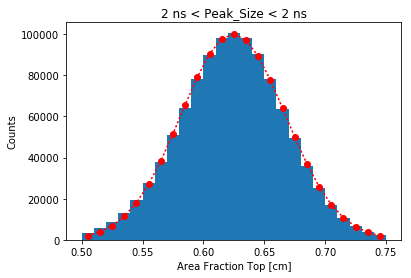

2.6 3.0
LowerBound selection: 43856722 rows removed (5.52% passed)
UpperBound selection: 1528474 rows removed (40.31% passed)
Amplitude a: 141426.0210+/-340213.2039
Mean a: 0.6241+/-0.000000
Sigma a: 0.0272+/-0.000000


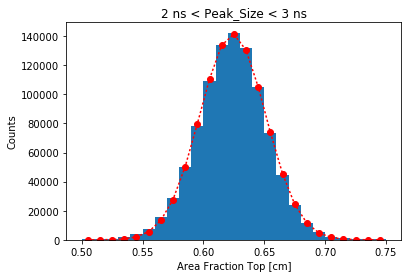

3.0 3.4000000000000004
LowerBound selection: 44889023 rows removed (3.29% passed)
UpperBound selection: 638381 rows removed (58.23% passed)
Amplitude a: 185010.2629+/-682358.3429
Mean a: 0.6241+/-0.000000
Sigma a: 0.0189+/-0.000000


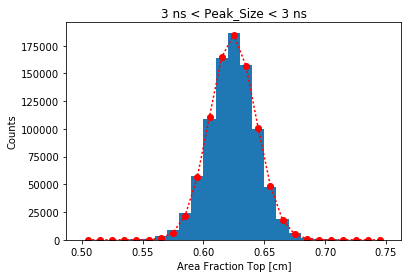

3.4000000000000004 3.8000000000000003
LowerBound selection: 45779116 rows removed (1.38% passed)
UpperBound selection: 251512 rows removed (60.60% passed)
Amplitude a: 98555.4522+/-590718.6817
Mean a: 0.6251+/-0.000000
Sigma a: 0.0150+/-0.000000


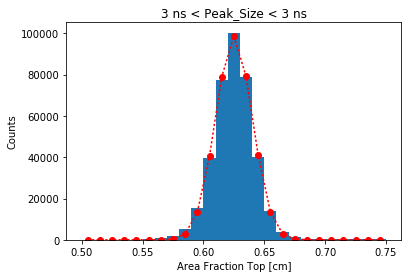

3.8000000000000003 4.2
LowerBound selection: 46165985 rows removed (0.54% passed)
UpperBound selection: 65737 rows removed (73.86% passed)
Amplitude a: 41121.3521+/-1555914.2001
Mean a: 0.6304+/-0.000000
Sigma a: 0.0172+/-0.000000


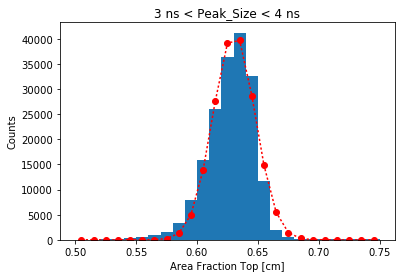

4.2 4.6
LowerBound selection: 46351760 rows removed (0.14% passed)
UpperBound selection: 47839 rows removed (27.23% passed)
Amplitude a: 3567.4032+/-17483.4399
Mean a: 0.6349+/-0.000001
Sigma a: 0.0166+/-0.000001


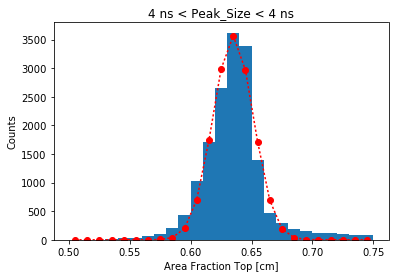

4.6 5.0
LowerBound selection: 46369658 rows removed (0.10% passed)
UpperBound selection: 34635 rows removed (27.60% passed)
Amplitude a: 2148.1724+/-14464.5440
Mean a: 0.6415+/-0.000002
Sigma a: 0.0208+/-0.000002


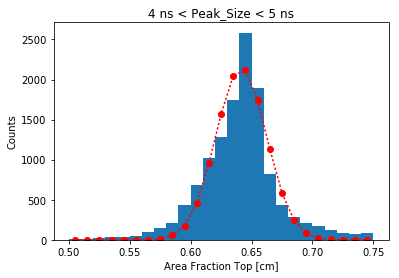

In [106]:
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

peak_size=np.linspace(1, 5, 11)

dict_aft_fits={}

_bins=25
_aft_lower=0.5
_aft_upper=0.75
_aft_range=[_aft_lower, _aft_upper]

for key, data in dict_datasets.items():
    print(key, len(data))

    fit_means=[]
    fit_sigmas=[]
    
    for index, bound in enumerate(peak_size[:-1]):
        print(peak_size[index], peak_size[index+1])
    
        data_slice = hax.cuts.selection(data, np.log10(data['area'])>peak_size[index], 'LowerBound')
        data_slice = hax.cuts.selection(data_slice, np.log10(data_slice['area'])<peak_size[index+1], 'UpperBound')

        content = plt.hist(data_slice.area_fraction_top, bins=_bins, range=_aft_range)

        x=content[1][:-1]+(content[1][1:]-content[1][:-1])/2 #bin_centers
        y=content[0] #bin_content

        def gaus_1d(x, a, xa, sigma_a):
            return a*exp(-(x-xa)**2/(2*sigma_a**2))

        initial_values = [np.max(y), 0.65, 0.05]

        popt,pcov = curve_fit(gaus_1d,x,y,p0=initial_values)
        print("Amplitude a: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
        print("Mean a: %.4f+/-%.6f" %(popt[1],pcov[1][1]))
        fit_means.append(popt[1])
        fit_sigmas.append(popt[2])
        #c_means_error.append(pcov[1][1])
        print("Sigma a: %.4f+/-%.6f" %(popt[2],pcov[2][2]))


        plt.title("%i ns < Peak_Size < %i ns" %(peak_size[index], peak_size[index+1]))
        plt.plot(x,gaus_1d(x,*popt),'ro:')
        plt.xlabel('Area Fraction Top [cm]')
        plt.ylabel('Counts')
        #plt.savefig('radial_displacement_%i.pdf' %index)
        #plt.savefig('radial_displacement_%i.png' %index)
        plt.legend()
        plt.show()
    dict_aft_fits[key]={'means':fit_means, 'sigmas': fit_sigmas, 'bins':peak_size[:-1]+(peak_size[1:]-peak_size[:-1])/2}

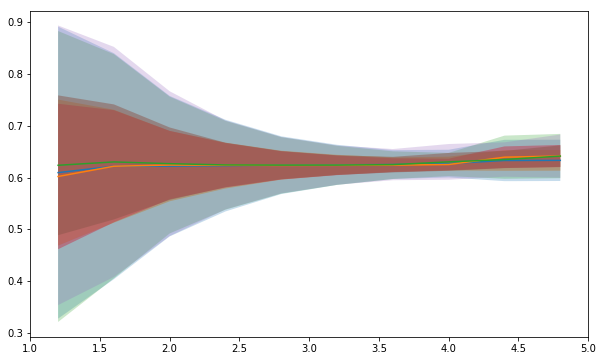

In [108]:
peak_size=np.linspace(1, 5, 11)
peak_bins=peak_size[:-1]+(peak_size[1:]-peak_size[:-1])/2

fig=plt.figure(figsize=(10, 6))
for key, dict_list in dict_aft_fits.items():
    plt.plot(peak_bins, dict_list['means'])
    
    # 3-sigma
    y1=np.array(dict_list['means'])-2*np.array(dict_list['sigmas'])
    y2=np.array(dict_list['means'])+2*np.array(dict_list['sigmas'])
    plt.fill_between(peak_bins, y1, y2, interpolate=True, alpha = 0.25)
    
    #2-sigma
    y1=np.array(dict_list['means'])-np.array(dict_list['sigmas'])
    y2=np.array(dict_list['means'])+np.array(dict_list['sigmas'])    
    plt.fill_between(peak_bins, y1, y2, interpolate=True, alpha = 0.5)
plt.xlim([1, 5])
plt.show()

In [109]:
with open('aft_fit_values.pkl', 'wb') as handle:
    pickle.dump(dict_aft_fits, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Look At any X-Y Effects on Peaks

In [123]:
dict_datasets_ext={}
for key, data in dict_datasets.items():
    data['r_peak_nn'] = np.sqrt(data['x_p_nn']**2+data['y_p_nn']**2)
    data['r_peak_tpf'] = np.sqrt(data['x_p_tpf']**2+data['y_p_tpf']**2)
    dict_datasets_ext[key]=data


In [124]:
dict_datasets_xy={}
for key, data in dict_datasets_ext.items():
    data_test=hax.cuts.selection(data, data['r_peak_tpf']<35, "Radial Cut")
    dict_datasets_xy[key]=data_test

Radial Cut selection: 14501343 rows removed (71.40% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Radial Cut selection: 13533123 rows removed (73.41% passed)
Radial Cut selection: 15032239 rows removed (67.62% passed)


Radon 36207812


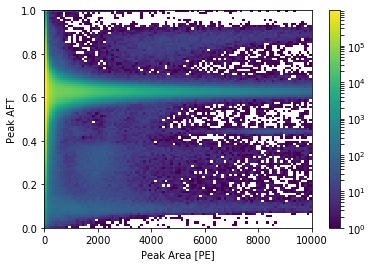

Background 37365020


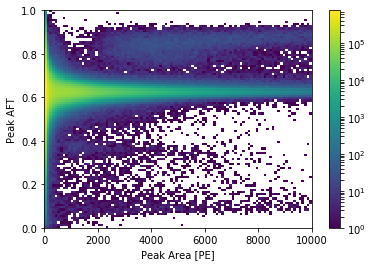

Krypton 31385258


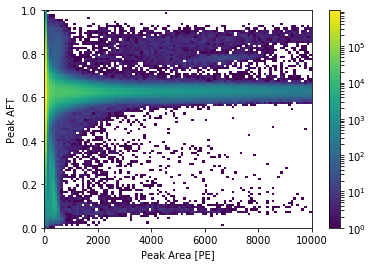

In [125]:
_xbins=100
_ybins=100
_x_lower=0
_x_upper=10000
_y_lower=0
_y_upper=1

_x_range=[_x_lower, _x_upper]
_y_range=[_y_lower, _y_upper]

for key, data in dict_datasets_xy.items():
    print(key, len(data))
    plt.hist2d(data.area, data.area_fraction_top, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    plt.xlabel('Peak Area [PE]') 
    plt.ylabel('Peak AFT')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()

Radon 50709155


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


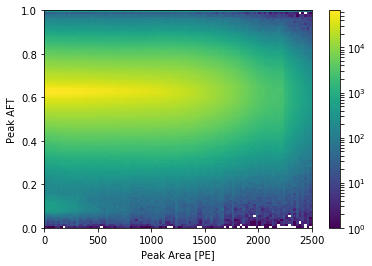

Background 50898143


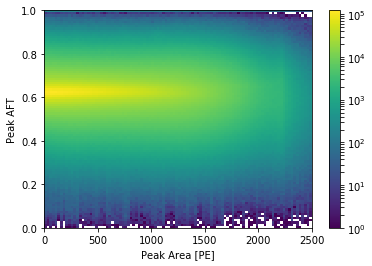

Krypton 46417497


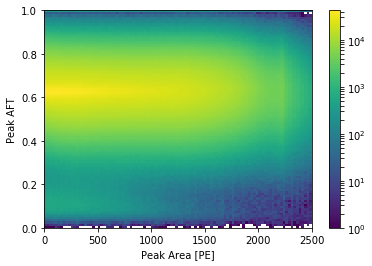

In [126]:
_xbins=100
_ybins=100
_x_lower=0
_x_upper=50**2
_y_lower=0
_y_upper=1

_x_range=[_x_lower, _x_upper]
_y_range=[_y_lower, _y_upper]

for key, data in dict_datasets_ext.items():
    print(key, len(data))
    plt.hist2d(data.r_peak_nn**2, data.area_fraction_top, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    plt.xlabel('Peak Radius [cm${}^2$]') 
    plt.ylabel('Peak AFT')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()

Radon 50709155


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


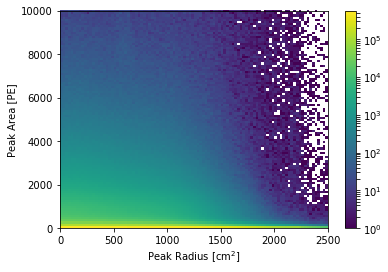

Background 50898143


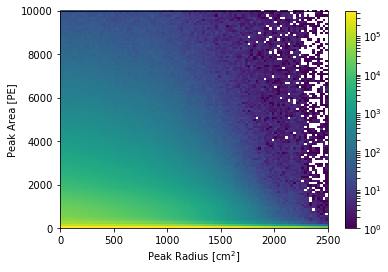

Krypton 46417497


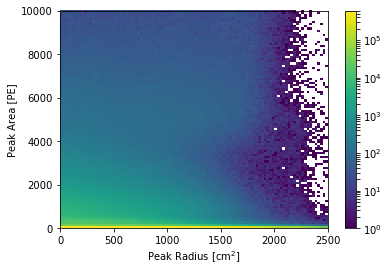

In [127]:
_xbins=100
_ybins=100
_x_lower=0
_x_upper=50**2
_y_lower=0
_y_upper=10000

_x_range=[_x_lower, _x_upper]
_y_range=[_y_lower, _y_upper]

for key, data in dict_datasets_ext.items():
    print(key, len(data))
    plt.hist2d(data.r_peak_nn**2, data.area, bins=[_xbins, _ybins],
               range=[_x_range, _y_range], vmin=1, norm=LogNorm())
    plt.colorbar()
    plt.xlabel('Peak Radius [cm${}^2$]') 
    plt.ylabel('Peak Area [PE]')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    plt.show()

### Apply Data Quality Cuts ####

In [ ]:
from lax.lichens import sciencerun1
dict_cuts={}
for key, df in dict_datasets.items():
    df_cut = sciencerun1.S2Width().process(df)
    df_cut = hax.cuts.selection(df_cut, df_cut['CutS2Width'], 'CutS2Width')
    dict_cuts[key]=df_cut

### Unique Events in Each Datasets (for Normalizing) ####

In [ ]:
for key, df in dict_datasets.items():
    files = df['run_number'].unique()
    count = 0
    for run in files:
        df_run= df.loc[df['run_number']==run]
        count+=len(df_run['event_number'].unique())
    print(key, count)

In [ ]:
#%%capture
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
data_se=dataset
data_se=hax.cuts.selection(data_se, data_se['r_s2']<20, 'RadialSelection')
a_means=[]
b_means=[]
a_means_error=[]
b_means_error=[]

time_series = np.linspace(0, 2000000, 15)
for index in range(len(time_series[:-1])):

    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _r_lower=-50
    _r_upper=50
    _r_range=[_r_lower, _r_upper]
    plt.set_cmap("viridis")
    content =plt.hist(data_slice.r_se-data_slice.r_s2, bins=_bins, range=_r_range)

    x=content[1][:-1]+(content[1][1:]-content[1][:-1])/2 #bin_centers
    y=content[0] #bin_content

    def gaus(x, a, xa, sigma_a, b, xb, sigma_b):
        return a*exp(-(x-xa)**2/(2*sigma_a**2))+b*exp(-(x-xb)**2/(2*sigma_b**2))

    initial_values = [40000, 4, 4, 50000, 22, 12]

    popt,pcov = curve_fit(gaus,x,y,p0=initial_values)
    print("Amplitude a: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    print("Mean a: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    a_means.append(popt[1])
    a_means_error.append(pcov[1][1])
    print("Sigma a: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    print("Amplitude b: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    print("Mean b: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    b_means.append(popt[4])
    b_means_error.append(pcov[4][4])    
    print("Sigma b: %.4f+/-%.4f" %(popt[5],pcov[5][5]))

    
    plt.title("%i ns < Time Delay < %i ns" %(time_series[index], time_series[index+1]))
    plt.plot(x,gaus(x,*popt),'ro:')
    plt.xlabel('Radial Displacement [cm]')
    plt.ylabel('Counts')
    #plt.savefig('radial_displacement_%i.pdf' %index)
    #plt.savefig('radial_displacement_%i.png' %index)
    plt.legend()
    plt.show()


In [ ]:
plt.errorbar(time_series[:-1]/1000, a_means[0:], yerr=a_means_error[0:], color='b', label='SR0', ecolor='b', fmt='s')
#plt.errorbar(time_series[:-1]/1000, b_means_sr1[0:], yerr=b_means_error_sr1[0:], color='r', label='SR0', ecolor='r', fmt='s')
#plt.errorbar(time_series[:-1]/1000, a_means_sr1[0:], yerr=a_means_error_sr1[0:], color='r', label='SR1', ecolor='r', fmt='o')
#plt.errorbar(time_series[1:-1], b_means[1:], yerr=b_means_error[1:], color='b', label='Higher Distribution')
plt.ylim(0, 16)
#plt.xlim(550, 2000)
plt.ylabel('Radial Displacement [cm]')
plt.xlabel('Time Delay [$\mu$s]')
axes=plt.gca()
axes.ticklabel_format(axis='x', style='sci')
plt.savefig('time_delay_displacement.pdf')
plt.savefig('time_delay_displacement.png')
#plt.legend(loc='best')

### Select S2s in small volume. Look at displacement of SEs following ###

In [ ]:
def gauss_2d(data_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta):
    (x, y) = data_tuple
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()


In [ ]:
def double_gauss_2d(data_tuple, amp_0, xo, yo, sigma_x0, sigma_y0, theta_0, amp_1, x1, y1, sigma_x1, sigma_y1, theta_1):
    (x, y) = data_tuple
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta_0)**2)/(2*sigma_x0**2) + (np.sin(theta_0)**2)/(2*sigma_y0**2)
    b = -(np.sin(2*theta_0))/(4*sigma_x0**2) + (np.sin(2*theta_0))/(4*sigma_y0**2)
    c = (np.sin(theta_0)**2)/(2*sigma_x0**2) + (np.cos(theta_0)**2)/(2*sigma_y0**2)
    d = (np.cos(theta_1)**2)/(2*sigma_x1**2) + (np.sin(theta_1)**2)/(2*sigma_y1**2)
    e = -(np.sin(2*theta_1))/(4*sigma_x1**2) + (np.sin(2*theta_1))/(4*sigma_y1**2)
    f = (np.sin(theta_1)**2)/(2*sigma_x1**2) + (np.cos(theta_1)**2)/(2*sigma_y1**2)
    g = amp_0*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2))) 
    + amp_1*np.exp( - (d*((x-x1)**2) + 2*e*(x-x1)*(y-y1) + f*((y-y1)**2)))
    return g.ravel()


In [ ]:
from scipy.optimize import curve_fit

def fit_gauss_2d(initial_guess, counts, xedges, yedges):
    xcenters = xedges[:-1]+(xedges[1:]-xedges[:-1])/2
    ycenters = yedges[:-1]+(yedges[1:]-yedges[:-1])/2
    x_bins, y_bins = np.meshgrid(xcenters, ycenters)
    try:
        popt, pcov = curve_fit(gauss_2d, (x_bins, y_bins), counts.ravel(), p0=initial_guess, maxfev=2500)
        counts_fitted = gauss_2d((x_bins, y_bins), *popt)
        plt.contour(y_bins, x_bins, counts_fitted.reshape(_xbins, _ybins), 3, colors='w')
        return [popt[1], popt[2], pcov[1][1], pcov[2][2]]
    except RuntimeError:
        return [-100, -100, 0, 0] 
    except ValueError:
        print(counts)

    #print("Amplitude A: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    #print("Y Mean: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    #print("Y Sigma: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    #print("X Mean: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    #print("X Sigma: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    
    return [popt[1], popt[2], pcov[1][1], pcov[2][2]]

In [ ]:
from scipy.optimize import curve_fit

def fit_double_gauss_2d(initial_guess, counts, xedges, yedges):
    xcenters = xedges[:-1]+(xedges[1:]-xedges[:-1])/2
    ycenters = yedges[:-1]+(yedges[1:]-yedges[:-1])/2
    x_bins, y_bins = np.meshgrid(xcenters, ycenters)
    try:
        popt, pcov = curve_fit(double_gauss_2d, (x_bins, y_bins), counts.ravel(), p0=initial_guess, maxfev=2500)
        counts_fitted_0 = gauss_2d((x_bins, y_bins), *popt[:6])
        counts_fitted_1 = gauss_2d((x_bins, y_bins), *popt[6:])
        plt.contour(y_bins, x_bins, counts_fitted_0.reshape(_xbins, _ybins), 3, colors='w')
        plt.contour(y_bins, x_bins, counts_fitted_1.reshape(_xbins, _ybins), 3, colors='r')
        
        print("Y0 Mean: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
        print("Y1 Mean: %.4f+/-%.4f" %(popt[7],pcov[7][7]))
        print("X0 Mean: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
        print("X1 Mean: %.4f+/-%.4f" %(popt[8],pcov[8][8]))
        
        return [popt[1], popt[2], popt[7], popt[8]]
    except RuntimeError:
        return [-100, -100, -100, -100] 


In [ ]:
data_radon=dict_datasets['radon_SR1']

In [ ]:
_xpoint = 10
_ypoint = 10
_width = 4
_xbins=40
_ybins=40
_x_lower=-50
_x_upper=50
_x_range=[_x_lower, _x_upper]
_y_lower=-50
_y_upper=50
_y_range=[_y_lower, _y_upper]
means=[]
data_xy = hax.cuts.range_selections(data_radon, ('x_s2_tpf', (_xpoint-_width/2, _xpoint+_width/2)),
                                    ('y_s2_tpf', (_ypoint-_width/2, _ypoint+_width/2)))

time_series = np.linspace(750000, 1750000, 9)
for index in range(len(time_series[:-1])):
    #initial_guess=(10,-5,-5,5,5,0,10,15,15,5,5,0)
    initial_guess=(10,_xpoint,_ypoint,2,2,0)
    
    data_slice=hax.cuts.range_selection(data_xy, 'time_since_s2', (time_series[index], time_series[index+1]))
    (counts, xedges, yedges, Image)=plt.hist2d(data_slice.x_p_tpf, data_slice.y_p_tpf, bins=[_xbins, _ybins], norm=LogNorm(), range=[_x_range, _y_range], vmin=1)
    plt.colorbar()
    fitvalues=fit_gauss_2d(initial_guess, counts, xedges, yedges)
    
    
    #fitvalues=fit_double_gauss_2d(initial_guess, counts, xedges, yedges)
    means.append(fitvalues)
    means_arr=np.array(means)
    means_flat=means_arr.ravel()
    #plt.xlabel('Electrons') 
    #plt.ylabel('Photons')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    #plt.legend()
    plt.show()

In [ ]:
%%capture
_xpoints = np.linspace(-40, 40, 21)
_ypoints = np.linspace(-40, 40, 21)

time_series = [0, 250000, 750000, 1250000, 1500000, 175000]
_width = 3
_xbins=40
_ybins=40
_x_lower=-50
_x_upper=50
_x_range=[_x_lower, _x_upper]
_y_lower=-50
_y_upper=50
_y_range=[_y_lower, _y_upper]
r_max=40
x_pos=[]
y_pos=[]

x_disp=[]
y_disp=[]
for _xpoint in tqdm(_xpoints):
    for _ypoint in _ypoints:
        if (_xpoint**2+_ypoint**2)>r_max**2:
            continue
        else:
            data_xy = hax.cuts.range_selections(data_radon, ('x_s2_nn', (_xpoint-_width/2, _xpoint+_width/2)),
                                                ('y_s2_nn', (_ypoint-_width/2, _ypoint+_width/2)))

            means=[]
            time_series = [0, 100000, 1500000, 2000000]
            for index in range(len(time_series[:-1])):
                initial_guess=(10,_xpoint,_ypoint,2,2,0)

                data_slice=hax.cuts.range_selection(data_xy, 'time_since_s2', (time_series[index], time_series[index+1]))
                (counts, xedges, yedges, Image)=plt.hist2d(data_slice.x_p_nn, data_slice.y_p_nn, bins=[_xbins, _xbins], range=[_x_range, _y_range], norm=LogNorm(), vmin=1)
                #plt.colorbar()
                try:
                    fitvalues=fit_gauss_2d(initial_guess, counts, xedges, yedges)
                except ValueError:
                    print(counts)
                means.append(fitvalues)
            means_arr=np.array(means)
            means_flat=means_arr.ravel()
            if means_flat[0]==-100 or means_flat[8]==-100:
                x_pos.append(0)
                y_pos.append(0)
                x_disp.append(0)
                y_disp.append(0)
            else:
                y_pos.append(means_flat[0])
                x_pos.append(means_flat[1])
                y_disp.append(means_flat[8]-means_flat[0])
                x_disp.append(means_flat[9]-means_flat[1])
                index+=1


In [ ]:
plt.figure(figsize=(10, 10))
Q=plt.quiver(x_pos, y_pos, x_disp, y_disp)  
plt.xlim(-45, 45)
plt.ylim(-45, 45)

In [ ]:
time_series=np.array(time_series)

In [ ]:
means_arr=np.array(means)
means_flat=means_arr.ravel()
time_axis=time_series[:-1]+(time_series[1:]-time_series[:-1])/2
plt.plot(time_axis/1000, means_flat[::4],  label='X0 Position', marker='o')
plt.plot(time_axis/1000, means_flat[1::4],  label='Y1 Position', marker = 's')
plt.legend(loc='best')

In [ ]:
means_arr=np.array(means)
means_flat=means_arr.ravel()
time_axis=time_series[:-1]+(time_series[1:]-time_series[:-1])/2
plt.errorbar(time_axis[1:]/1000, means_flat[5::4], yerr=means_flat[7::4], label='X Position')
plt.errorbar(time_axis[1:]/1000, means_flat[4::4], yerr=means_flat[6::4], label='Y Position')
plt.legend(loc='best')

In [ ]:
means_arr=np.array(means)
means_flat=means_arr.ravel()
time_axis=time_series[:-1]+(time_series[1:]-time_series[:-1])/2
plt.errorbar(time_axis[1:]/1000, means_flat[5::4], yerr=means_flat[7::4], label='X Position')
plt.errorbar(time_axis[1:]/1000, means_flat[4::4], yerr=means_flat[6::4], label='Y Position')
plt.legend(loc='best')

### Next Step ###

Kyk na delta theta

### Off Set of SEs ###

In [ ]:
datasets = {'SR0' : data_radon_sr0, 'SR1': data_radon_sr1}

In [ ]:
datasets_se={}
for key, dataset in datasets.items():
    data_se = hax.cuts.selection(dataset, dataset['r_s2']<20, 'Radial')
    data_se = hax.cuts.selection(dataset, dataset['n_hits']<36, 'SE Selection')
    datasets_se.update({key:data_se})

In [ ]:
_bins=100
_x_lower=-50
_x_upper=50
_x_range=[_x_lower, _x_upper]
_y_lower=-50
_y_upper=50
_y_range=[_y_lower, _y_upper]
#fig = plt.figure(figsize=(10, 8))
plt.set_cmap("viridis")
plt.hist2d(data_se.x_se, data_se.y_se, bins=[_bins, _bins], range=[_x_range, _y_range], norm=LogNorm(), vmin=1)
plt.colorbar()
#plt.xlabel('Electrons') 
#plt.ylabel('Photons')

In [ ]:
_bins=100
_r_lower=0
_r_upper=50
_el_range=[_r_lower, _r_upper]
_t_lower=0
_t_upper=4000000
_ph_range=[_t_lower, _t_upper]
fig = plt.figure(figsize=(10, 8))
plt.set_cmap("viridis")
plt.hist2d(data_se.dist_to_s2, data_se.time_since_s2, bins=[_bins, _bins], range=[_el_range, _ph_range], norm =LogNorm(), vmin=1)
plt.colorbar()
#plt.xlabel('Electrons') 
#plt.ylabel('Photons')

In [ ]:
%%capture
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
data_se=datasets_se['SR1']
a_means=[]
b_means=[]
a_means_error=[]
b_means_error=[]

time_series = np.linspace(0, 2000000, 19)
for index in range(len(time_series[:-1])):

    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _r_lower=-50
    _r_upper=50
    _r_range=[_r_lower, _r_upper]
    plt.set_cmap("viridis")
    content =plt.hist(data_slice.r_se-data_slice.r_s2, bins=_bins, range=_r_range)

    x=content[1][:-1]+(content[1][1:]-content[1][:-1])/2 #bin_centers
    y=content[0] #bin_content

    def gaus(x, a, xa, sigma_a, b, xb, sigma_b):
        return a*exp(-(x-xa)**2/(2*sigma_a**2))+b*exp(-(x-xb)**2/(2*sigma_b**2))

    initial_values = [40000, 4, 4, 50000, 22, 12]

    popt,pcov = curve_fit(gaus,x,y,p0=initial_values)
    print("Amplitude a: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    print("Mean a: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    a_means.append(popt[1])
    a_means_error.append(pcov[1][1])
    print("Sigma a: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    print("Amplitude b: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    print("Mean b: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    b_means.append(popt[4])
    b_means_error.append(pcov[4][4])    
    print("Sigma b: %.4f+/-%.4f" %(popt[5],pcov[5][5]))

    
    plt.title("%i ns < Time Delay < %i ns" %(time_series[index], time_series[index+1]))
    plt.plot(x,gaus(x,*popt),'ro:')
    plt.xlabel('Radial Displacement [cm]')
    plt.ylabel('Counts')
    #plt.savefig('radial_displacement_%i.pdf' %index)
    #plt.savefig('radial_displacement_%i.png' %index)
    plt.legend()
    plt.show()


In [ ]:
a_means_sr1=a_means
a_means_error_sr1=a_means_error

In [ ]:
a_means_sr0=a_means
a_means_error_sr0=a_means_error
b_means_sr0=b_means
b_means_error_sr0=b_means_error

In [ ]:
plt.errorbar(time_series[:-1]/1000, a_means_sr1[0:], yerr=a_means_error_sr1[0:], color='b', label='SR0', ecolor='b', fmt='s')
#plt.errorbar(time_series[:-1]/1000, b_means_sr1[0:], yerr=b_means_error_sr1[0:], color='r', label='SR0', ecolor='r', fmt='s')
#plt.errorbar(time_series[:-1]/1000, a_means_sr1[0:], yerr=a_means_error_sr1[0:], color='r', label='SR1', ecolor='r', fmt='o')
#plt.errorbar(time_series[1:-1], b_means[1:], yerr=b_means_error[1:], color='b', label='Higher Distribution')
plt.ylim(0, 16)
#plt.xlim(550, 2000)
plt.ylabel('Radial Displacement [cm]')
plt.xlabel('Time Delay [$\mu$s]')
axes=plt.gca()
axes.ticklabel_format(axis='x', style='sci')
plt.savefig('time_delay_displacement.pdf')
plt.savefig('time_delay_displacement.png')
#plt.legend(loc='best')

In [ ]:
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

c_means=[]
d_means=[]
c_means_error=[]
d_means_error=[]

time_series = np.linspace(1800000, 1900000, 2)
for index in range(len(time_series[:-1])):

    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _r_lower=-50
    _r_upper=50
    _r_range=[_r_lower, _r_upper]
    plt.set_cmap("viridis")
    content =plt.hist(data_slice.r_se-data_slice.r_s2, bins=_bins, range=_r_range)

    x=content[1][:-1]+(content[1][1:]-content[1][:-1])/2 #bin_centers
    y=content[0] #bin_content

    def gaus(x, a, xa, sigma_a, b, xb, sigma_b):
        return a*exp(-(x-xa)**2/(2*sigma_a**2))+b*exp(-(x-xb)**2/(2*sigma_b**2))

    initial_values = [4000, 4, 4, 3000, 29, 12]

    popt,pcov = curve_fit(gaus,x,y,p0=initial_values)
    print("Amplitude a: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    print("Mean a: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    c_means.append(popt[1])
    c_means_error.append(pcov[1][1])
    print("Sigma a: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    print("Amplitude b: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    print("Mean b: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    d_means.append(popt[4])
    d_means_error.append(pcov[4][4])    
    print("Sigma b: %.4f+/-%.4f" %(popt[5],pcov[5][5]))

    
    plt.title("%i ns < Time Delay < %i ns" %(time_series[index], time_series[index+1]))
    plt.plot(x,gaus(x,*popt),'ro:')
    plt.xlabel('Radial Displacement [cm]')
    plt.ylabel('Counts')
    #plt.savefig('radial_displacement_%i.pdf' %index)
    #plt.savefig('radial_displacement_%i.png' %index)
    plt.legend()
    plt.show()


In [ ]:
data_se=dict_datasets['radon_SR1']

In [ ]:
#%%capture
xspace=np.linspace(-20, 20, 21)
yspace=np.linspace(-20, 20, 21)
x_means=[]
y_means=[]
x_pos=[]
y_pos=[]
for x_index in range(len(xspace)-1):
    data_slice_x = hax.cuts.selection(data_se, data_se['x_s2_nn']>xspace[x_index], 'X LowerBound')
    data_slice_x = hax.cuts.selection(data_slice_x, data_slice_x['x_s2_nn']<xspace[x_index+1], 'X UpperBound')
    x_series=[]
    y_series=[]
    x_ave=[]
    y_ave=[]
    for y_index in range(len(yspace)-1):
        print(x_index, y_index)
        data_slice_y = hax.cuts.selection(data_slice_x, data_slice_x['y_s2_nn']>yspace[y_index], 'Y LowerBound')
        data_slice_y = hax.cuts.selection(data_slice_y, data_slice_y['y_s2_nn']<yspace[y_index+1], 'Y UpperBound')

        x_vector = data_slice_y.x_p_tpf - data_slice_y.x_s2_tpf
        y_vector = data_slice_y.y_p_tpf - data_slice_y.y_s2_tpf
        x_ave.append(np.mean(x_vector))
        y_ave.append(np.mean(y_vector))
        x_series.append(xspace[x_index]+(xspace[x_index+1]-xspace[x_index])/2)
        y_series.append(yspace[y_index]+(yspace[y_index+1]-yspace[y_index])/2)
        #print(x_index, y_index, x_ave, y_ave)
    x_pos.append(x_series)
    y_pos.append(y_series)
    x_means.append(x_ave)
    y_means.append(y_ave)


In [ ]:
plt.figure(figsize=(5.7, 5.7))
U=np.cos(x_means)
V=np.sin(y_means)
Q=plt.quiver(x_pos, y_pos, U, V)
plt.ylabel('Y Displacement [cm]')
plt.xlabel('X Displacement [cm]')
plt.savefig('average_displacement.pdf')
plt.savefig('average_displacement.png')
plt.show()

In [ ]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

a_means=[]
b_means=[]
a_means_error=[]
b_means_error=[]

time_series = np.linspace(0, 2000000, 51)
for index in range(len(time_series[:-1])):
    
    data_se = hax.cuts.selection(data_radon, data_radon['r_s2']<1, 'X-y selection')
    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _x_lower=-50
    _x_upper=50
    _x_range=[_x_lower, _x_upper]
    _y_lower=-50
    _y_upper=50
    _y_range=[_y_lower, _y_upper]
    #fig = plt.figure(figsize=(10, 8))
    plt.set_cmap("viridis")
    plt.hist2d(data_se.x_se, data_se.y_se, bins=[_bins, _bins], range=[_x_range, _y_range], norm=LogNorm(), vmin=1)
    plt.colorbar()
    #plt.xlabel('Electrons') 
    #plt.ylabel('Photons')
    plt.savefig('confined_xy_%i.pdf' %index)
    plt.savefig('confined_xy_%i.png' %index)
    plt.legend()
    plt.show()
